#### [ 미니 테스트  2024-03-14 ]<hr>

[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

지도학습이란, 학습 데이터(피처)와 그 각각의 데이터에 대응하는 답(라벨)을 학습시켜서 새로운 데이터를 넣었을 때 내가 제공한 답의 종류 중 가장 근접한 값을 도출하도록 하는 과정입니다.

[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

데이터 전처리 - 모델 생성, 학습 - 모델 성능평가 - 예측 으로 구성되어 있습니다.
데이터 전처리에는 중복치 제거, 이상치 제거, 스케일링 등이 해당하고,
모델 생성, 학습과정에는 적절한 모델 선택, 훈련 데이터와 평가 데이터 분리 등이 해당합니다.
모델 성능평가에서는 평가 데이터를 넣어서 예측값이 실제 답과 얼마나 비슷한지 여러 평가기준을 통해 분석합니다. 회귀모델일 경우 mse, r2-score가, 분류모델일 경우 precision, recall, f1-score가 평가기준에 해당합니다.
예측 단계에서 완전히 새로운 값을 넣어 답을 예측하는 용도로 사용합니다.

[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  
    - 조건  
    - 동작원리  
    - 선형식  
    - 오차/잔차 계산 방법  

 - 개념 : 각 피처에 해당하는 변수와 그 피처에 대응하는 가중치가 곱해져서 더해진 선형식을 구하는 것이 목표로, 학습 데이터와 그 선형식을 사용해 구한 예측값의 오차가 가장 적어지는 선형식을 구하는 작업입니다.
- 조건 : 구하려는 답(결과값)이 연속형이어야 합니다. 왜냐하면 지금 도출하고자 하는 선형식은 결과값이 연속형에 대응하기 때문입니다.
- 동작원리 : 어떤 가중치 값들과 절편값을 적용한 선형식으로 계산한 오차값의 추이를 분석해서, 가장 오차값이 빨리 줄어드는 방향으로 가중치 값들과 절편값을 조정하는 방식입니다.
- 선형식 : 각 피처에 해당하는 변수와 그 피처에 대응하는 가중치가 곱해져서 더해진 식입니다.
- 오차/잔차 계산 방법 : 학습 데이터셋이 있을 때, 그 중 어떤 학습 데이터의 x값을 모델이 갖고 있는 선형식에 대입해서 예측값 y'를 구합니다. 이 때, 그 학습 데이터의 실제 답 y도 주어지므로, (y - y')^2 값을 데이터셋에 있는 전체 학습 데이터로부터 계산하여 더하고, 그 값을 학습 데이터의 개수로 나눈 값을 MSE 라고 합니다. 그 MSE 값이 줄어드는 방향으로 선형 모델은 학습해 나갑니다.

[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')

In [88]:
from sklearn.datasets import fetch_openml

db_name = 'Fashion-MNIST'
fashion_data = fetch_openml(name=db_name, parser='auto', as_frame=False)

In [89]:
fashion_data.__dir__()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [90]:
fashion_data.data.shape, fashion_data.target.shape

((70000, 784), (70000,))

In [91]:
type(fashion_data.data), type(fashion_data.target)

(numpy.ndarray, numpy.ndarray)

In [92]:
fashion_data.data.dtype, fashion_data.target.dtype

(dtype('int64'), dtype('O'))

In [93]:
fashion_data.target.min(), fashion_data.target.max()    # '0' ~ '9' 로 구성

('0', '9')

In [94]:
fashion_x = fashion_data.data / 255     # 스케일링 (-> 손실함수 그래프가 완만해진다??) 
# 안 해주면 accracy 90% 가 한계! 
fashion_y = fashion_data.target.astype('int')

In [95]:
# [이진분류 전처리] 값이 0이 아닌 경우, 모두 '1'로 변경
mask = fashion_y == 0
fashion_y[~mask] = 1
fashion_y

array([1, 0, 0, ..., 1, 1, 1])

In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(0)

In [97]:
fashion_x_t = torch.tensor(fashion_x, dtype=torch.float)
fashion_y_t = torch.tensor(fashion_y, dtype=torch.float).unsqueeze(1)

In [98]:
fashion_x_t.dtype, fashion_y_t.dtype

(torch.float32, torch.float32)

In [99]:
fashion_x_t.shape, fashion_y_t.shape

(torch.Size([70000, 784]), torch.Size([70000, 1]))

In [107]:
model = nn.Sequential(
    nn.Linear(784, 1),
    nn.Sigmoid()
)

In [115]:
optimizer = optim.SGD(model.parameters(), lr=1)

In [116]:
def training():
    n_epochs = 1000
    for epoch in range(n_epochs+1):
        # 예측값 생성
        hypothesis = model(fashion_x_t)                         # float
        
        cost = F.binary_cross_entropy(hypothesis, fashion_y_t)  # float
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        # 100번마다 로그 출력
        if epoch % 100 == 0:
            prediction = hypothesis >= torch.FloatTensor([0.5])     # 예측값이 0.5를 넘으면 True로 간주
            correct_prediction = prediction.float() == fashion_y_t      # 실제값과 일치하는 경우만 True로 간주
            accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
 
            print(f'Epoch {epoch:4d}/{n_epochs} Cost: {cost.item():.6f} Accuracy {accuracy * 100:2.2f}%')

In [117]:
training()

Epoch    0/1000 Cost: 0.172795 Accuracy 94.01%
Epoch  100/1000 Cost: 0.208252 Accuracy 93.88%
Epoch  200/1000 Cost: 0.117545 Accuracy 96.07%
Epoch  300/1000 Cost: 0.167560 Accuracy 94.85%
Epoch  400/1000 Cost: 0.114400 Accuracy 96.09%
Epoch  500/1000 Cost: 0.113441 Accuracy 95.96%
Epoch  600/1000 Cost: 0.216158 Accuracy 93.32%
Epoch  700/1000 Cost: 0.131561 Accuracy 95.75%
Epoch  800/1000 Cost: 0.111089 Accuracy 96.14%
Epoch  900/1000 Cost: 0.311975 Accuracy 92.89%
Epoch 1000/1000 Cost: 0.112391 Accuracy 96.14%


### 강사님 코드

### softmax(), sigmoid() 함수 <hr>
- sigmoid() : y=wx+b 결과    1개 전달 => 반환 : 0.0 ~ 1.0 사이 값으로 변환
- softmax() : y=wx+b 결과 여러개 전달 => 반환 : 여러개의 결과값의 합이 1.0이 되도록 변환 => 다중분류

In [118]:
# 모듈 로딩
import torch                        # PyTorch 기본 모듈 (텐서 및 기본 함수들)
import torch.nn.functional as F     # PyTorch 인공신경망 관련 함수들

In [119]:
# 임의 데이터 생성
data1 = torch.tensor([1, 2, 1, 1, 2])
data1.shape

torch.Size([5])

In [120]:
F.sigmoid(data1)

tensor([0.7311, 0.8808, 0.7311, 0.7311, 0.8808])

In [125]:
data1.unsqueeze_(dim=1)
data1.shape

torch.Size([5, 1])

In [138]:
input = torch.rand(2, 3)
output = F.softmax(input)
output.sum(dim=1)

C:\Users\kdp\AppData\Local\Temp\ipykernel_21916\3182668218.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = F.softmax(input)


tensor([1.0000, 1.0000])

In [139]:
output.max(dim=1)[1][0].item()

1

In [140]:
output.argmax(dim=1)

tensor([1, 0])

[5] 번 문제 풀이

(1) 모듈 로딩 및 데이터 준비

In [151]:
# 모듈 로딩
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import torch
import torch.nn as nn               # LinearRegression 기능의 클래스 Linear
import torch.nn.functional as F     # 손실함수
import torch.optim as optim         # 경사하강법 기반의 최적화 관련 모듈

In [152]:
# 데이터 준비
fashion_db = 'fashion-mnist'

fashion_data = fetch_openml(name=fashion_db, parser='auto') #, as_frame=False)

In [153]:
feature = fashion_data['data']
target = fashion_data['target']

In [154]:
# 피처와 타겟 개수 확인
print(f'feature => {feature.shape}, {feature.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (70000, 784), 2D
target => (70000,), 1D


In [155]:
# 분류 확인
print(f'feature name => {fashion_data["feature_names"]}')
print(f'target name => {fashion_data["target_names"]}')
print(f'categories => {fashion_data["categories"]}')
print(f'categories -> {target.unique()}')

feature name => ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'p

(2) 데이터 가공 및 전처리 <hr>
- 결측치/중복/이상치 => 없음
- 다중분류 => 2진분류 변환 : target 변환
- 표준화 => 이미지 처리 (동일 크기 및 색상채널) : 동일크기(28x28)와 채널(흑백 1)
- 정규화 => 피처 정규화 / 타겟 정규화

In [157]:
## => [2-1] 다중분류 => 2진분류 (변환 : target 변환)
target = target == '0'
target.unique()

array([False,  True])

In [161]:
## => [2-2] 정규화 => 피처 : 784개는 색상값 (0 ~ 255 범위 값)
norm_feature = feature / 255.
norm_feature.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
## => [2-2] 정규화 => 타겟 : One-Hot-Encoding 으로 변환
pd.get_dummies(target)      # DataFrame 에서 바로 생성

,False,True
0,True,False
1,False,True
2,False,True
3,True,False
4,False,True
...,...,...
69995,True,False
69996,True,False
69997,True,False
69998,True,False


In [175]:
type(target), target.shape, target.ndim

(pandas.core.series.Series, (70000,), 1)

In [176]:
targetDF = target.to_frame()    # Series(1차원)를 DataFrame(2차원)으로 변환
print(targetDF.shape, targetDF.ndim)

(70000, 1) 2


In [167]:
from sklearn.preprocessing import OneHotEncoder

ohEncoder = OneHotEncoder(sparse_output=False)      # sparse_output=False : transform() 반환값 => ndarray
ohEncoder.fit(targetDF)                             # 2차원 데이터를 넘겨줘야 함
ohEncoder.categories_                               # 0번째 컬럼의 값이 1이면 타겟 값이 False, 1번째 컬럼의 값이 1이면 타겟 값이 True

[array([False,  True])]

In [170]:
norm_target = ohEncoder.transform(targetDF)
norm_target.shape, norm_target.ndim

((70000, 2), 2)

(3) 학습 준비 <hr>
- 데이터셋 준비 : 텐서화 & (훈련용, 테스트용)
- 학습 방법 : 지도학습 - 이진분류    (=> Linear 클래스 + sigmoid 함수)
- 최적화방법: 경사하강법 기반의 방법 (=> Adam, SGD, ...)
- 손실함수 : 이진분류 손실 계산 함수 (=> binary_cross_entropy)

In [182]:
### => 데이터셋 준비 : 60000개 훈련, 10000개 테스트
limit = 60000
train = norm_feature.iloc[:limit]
test = norm_feature.iloc[limit:]

train_y = target[:limit]
test_y = target[limit:]

In [183]:
print(f'{train.shape}, {test.shape}')
print(f'{train_y.shape}, {test_y.shape}')

(60000, 784), (10000, 784)
(60000,), (10000,)


In [203]:
# 텐서로 변환
x_train = torch.FloatTensor(train.values)
y_test = torch.FloatTensor(test.values)

y_train = torch.FloatTensor(train_y.values).unsqueeze(dim=1)
y_test = torch.FloatTensor(test_y.values).unsqueeze(dim=1)

In [204]:
print(f'{x_train.shape}, {x_train.ndim}, {y_train.shape}, {y_train.ndim}')

torch.Size([60000, 784]), 2, torch.Size([60000, 1]), 2


In [205]:
## 학습 인스턴스 생성
in_, out_ = x_train.shape[1], y_train.shape[1]
model = nn.Linear(in_, out_)    # w1x1 + w2x2 + ... + w784x784 + b
model                           # Linear() 가 필요한 tensor(requires_grad=True)를 생성함

Linear(in_features=784, out_features=1, bias=True)

In [206]:
## 최적화 인스턴스 생성
optimizer = optim.Adam(model.parameters())  # [w1, w2, ... , w784, b]

In [207]:
## 학습 횟수 => 샘플 처음부터 끝까지 읽는 것 기준으로 횟수 지정
EPOCHS = 150

(4) 학습 진행

In [222]:
loss_list = []
accuracy_list = []

for ep in range(EPOCHS):
    # 학습
    y_pred = model(x_train)
    # print(f'예측값 : {y_pred}')
    
    # 분류값 변환
    y_pred2 = F.sigmoid(y_pred)     # [0, 1) 값으로 변환
    # print(f'분류값 : {y_pred2}')
    
    # 오차 즉 손실 계산
    loss = F.binary_cross_entropy(y_pred2, y_train)     # y_train이 Float 여야 함
    loss_list.append(loss.item())
    print(f'[{ep:3}] Loss : {loss:<20}   ', end='')
    
    # W, b 업데이트
    optimizer.zero_grad()
    loss.backward()                 # 손실함수 계산값으로 미분 진행하여 새로운 W, b 계산
    optimizer.step()                # 새로운 값으로 W, b 업데이트
    
    # 정확도 계산 => 예측값을 0과 1로 변환 -> 정답과 비교
    train_accuracy = ((y_train == (y_pred2 >= 0.5)).sum()) / y_train.shape[0]
    accuracy_list.append(train_accuracy)
    print(f'Accuracy : {train_accuracy:<20}')

[  0] Loss : 0.11221575736999512    Accuracy : 0.9569500088691711  
[  1] Loss : 0.11220212280750275    Accuracy : 0.956933319568634   
[  2] Loss : 0.11218850314617157    Accuracy : 0.956933319568634   
[  3] Loss : 0.11217489093542099    Accuracy : 0.956933319568634   
[  4] Loss : 0.1121613085269928     Accuracy : 0.956933319568634   
[  5] Loss : 0.1121477261185646     Accuracy : 0.9569500088691711  
[  6] Loss : 0.1121341809630394     Accuracy : 0.9569500088691711  
[  7] Loss : 0.11212065070867538    Accuracy : 0.956933319568634   
[  8] Loss : 0.11210712045431137    Accuracy : 0.956933319568634   
[  9] Loss : 0.11209362000226974    Accuracy : 0.956933319568634   
[ 10] Loss : 0.11208013445138931    Accuracy : 0.956933319568634   
[ 11] Loss : 0.11206666380167007    Accuracy : 0.956933319568634   
[ 12] Loss : 0.11205322295427322    Accuracy : 0.9569500088691711  
[ 13] Loss : 0.11203976720571518    Accuracy : 0.9569666385650635  
[ 14] Loss : 0.11202635616064072    Accuracy : 0

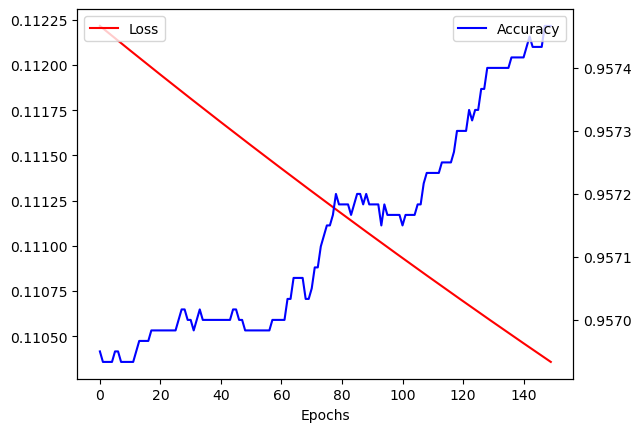

In [237]:
## 손실과 정확도 시각화
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()       # 축 정보를 갖고 있는 것이 ax1
ax1.plot(loss_list, label='Loss', color='red')

# x축 공유
ax2 = ax1.twinx()
ax2.plot(accuracy_list, label='Accuracy', color='blue')

ax1.set_xlabel('Epochs')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()